## Lab 3 Task 1
### Andrii Prykhodko FB-31mp

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.python.layers import layers

2023-11-18 23:06:59.725559: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
dataset = "/Users/andrii.p/Downloads/archive (1)/train.csv"

In [3]:
data = pd.read_csv(dataset)

In [4]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [5]:
X = data.drop('fake',axis=1)
y = data['fake']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model =  keras.Sequential()

In [9]:
model.add(layers.Dense(256, input_shape=(11,), activation="sigmoid"))#1th hiddenlayer
model.add(layers.Dense(128, activation="sigmoid"))#2th hiddenlayer
model.add(layers.Dense(4, activation="softmax"))#outputlayer

In [10]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')

In [11]:
model.fit(X_train, tf.one_hot(y_train, 4), epochs=100, batch_size=16)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/keras/engine/base_layer.py:1344: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


26/26 [==============================] - 0s 1ms/step - loss: 1.0278
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7678
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7278
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.7197
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6985
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6941
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6871
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6806
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6759
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6724
Epoch 11/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6628
Epoch 12/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6599
Epoch 13/100
26/26 [=============================

In [12]:
Y_pred = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


In [13]:
Y_pred

array([[9.84039426e-01, 1.56494137e-02, 1.41124183e-04, 1.70089028e-04],
       [7.91646838e-01, 2.07292318e-01, 5.21387847e-04, 5.39355213e-04],
       [1.82868671e-02, 9.81316864e-01, 2.20382703e-04, 1.75831956e-04],
       [8.19249034e-01, 1.79748878e-01, 5.00111957e-04, 5.01972856e-04],
       [3.51711810e-02, 9.64290261e-01, 2.94411380e-04, 2.44163122e-04],
       [3.07129681e-01, 6.91603005e-01, 6.39751088e-04, 6.27469330e-04],
       [4.68599856e-01, 5.30065656e-01, 6.71135669e-04, 6.63470419e-04],
       [8.26759219e-01, 1.72236502e-01, 4.91250423e-04, 5.13125444e-04],
       [4.91187908e-02, 9.50253546e-01, 3.43191292e-04, 2.84289097e-04],
       [8.90079200e-01, 1.09110586e-01, 3.89533787e-04, 4.20582568e-04],
       [1.83805507e-02, 9.81220126e-01, 2.21331269e-04, 1.78048140e-04],
       [2.79330224e-01, 7.19382644e-01, 6.79520890e-04, 6.07493042e-04],
       [7.84479320e-01, 2.14417368e-01, 5.55503473e-04, 5.47787698e-04],
       [1.10325761e-01, 8.88779283e-01, 4.83559270e

In [14]:
Y_pred = np.argmax(Y_pred, axis=1)

In [15]:
Y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [16]:
print(accuracy_score(y_test, Y_pred))

0.8901734104046243


In [17]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89        80
           1       0.94      0.85      0.89        93

    accuracy                           0.89       173
   macro avg       0.89      0.89      0.89       173
weighted avg       0.90      0.89      0.89       173



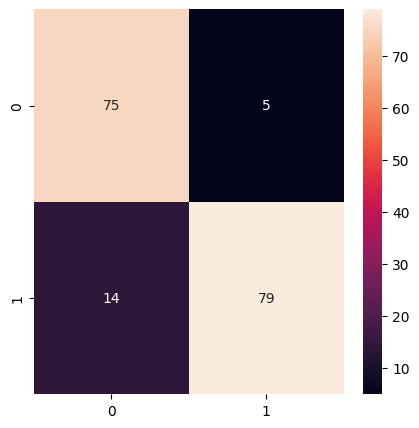

In [18]:
plt.figure(figsize=(5, 5))
cm=confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True)
plt.show()